In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [13]:
loaded = np.loadtxt("processed_data.txt", skiprows=1)
t = loaded[:,0]
y = loaded[:,1]

sigma_meas = 0.25

In [14]:
def tide_model(t, A0, A1, phi1, P1, A2, phi2, P2):
    return (A0
            + A1*np.cos(2*np.pi*t/P1 + phi1)
            + A2*np.cos(2*np.pi*t/P2 + phi2))

In [15]:
p0 = [
    y.mean(),
    (y.max() - y.min())/2,
    0,
    12.42,
    (y.max() - y.min())/8,
    0,
    24.0
]

In [16]:
popt, pcov = curve_fit(
    tide_model, t, y,
    p0=p0,
    sigma=np.full_like(y, sigma_meas),
    absolute_sigma=True,
    maxfev=20000
)

perr = np.sqrt(np.diag(pcov))

for name, val, err in zip(
    ["A0","A1","phi1","P1","A2","phi2","P2"],
    popt, perr
):
    print(f"{name} = {val:.4f} ± {err:.4f}")

A0 = 2.3346 ± 0.0312
A1 = 2.3206 ± 0.0370
phi1 = 1.5480 ± 0.0588
P1 = 12.3954 ± 0.0021
A2 = 0.5463 ± 0.0419
phi2 = -8.2117 ± 0.1541
P2 = 23.2724 ± 0.0241


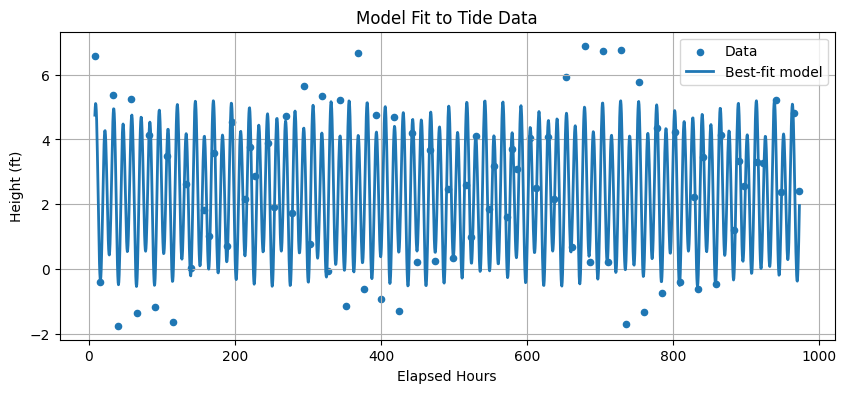

In [22]:
t_dense = np.linspace(t.min(), t.max(), 2000)
y_model = tide_model(t_dense, *popt)

plt.figure(figsize=(10,4))
plt.scatter(t, y, s=20, label="Data")
plt.plot(t_dense, y_model, lw=2, label="Best-fit model")
plt.xlabel("Elapsed Hours")
plt.ylabel("Height (ft)")
plt.grid(True)
plt.legend()
plt.title("Model Fit to Tide Data")
plt.savefig("model_vs_data.pdf")
plt.show()


In [21]:
np.savetxt("best_fit_params.txt", popt)